In [1]:
# -*- coding: utf-8 -*-
#  File: eda.ipynb
#  Project: 'OTUS.PRO Homework #5'
#  Created by Gennady Matveev (gm@og.ly) on 22-05-2022.

# **$Homework$** **$5$**  
**OTUS Machine Learning Professional**

![Parsing and NLP](https://docs.google.com/uc?export=download&id=10d8UpDr67Ib2_GdlzCK2xVyuVrpNevsh)

#### Open notebook(s) on mybinder.org [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/oort77/OTUS_PRO_HW5/main)  

In [2]:
%%capture
# pip install binsreg

### Import libraries

In [3]:
%load_ext nb_black
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import binsreg

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

<IPython.core.display.Javascript object>

### Read data

In [4]:
medium_df = pd.read_csv("./data/medium_df.csv")
medium_df.head()

,id,url,author,title,subtitle,claps,responses,reading_time,publication,pub_date
0,1,https://towardsdatascience.com/how-to-give-you...,Kasper Müller,How to Give Your Python Code a Magic Touch,Building a powerful polynomial engine for easy...,275,3,6,Towards Data Science,2021-11-02
1,2,https://towardsdatascience.com/an-experience-o...,Antriksh Goel,An experience of a “Data Ecosystem”,This article talks about how data is treated a...,642,10,11,Towards Data Science,2021-11-02
2,3,https://towardsdatascience.com/staccato-espres...,Robert McKeon Aloe,Staccato Espresso is Fundamentally Better than...,NaN,41,0,7,Towards Data Science,2021-11-02
3,4,https://towardsdatascience.com/overfitting-and...,Dmytro Nikolaiev (Dimid),"<strong class=""markup--strong markup--h3-stron...","<strong class=""markup--strong markup--h4-stron...",132,2,10,Towards Data Science,2021-11-02
4,5,https://towardsdatascience.com/why-the-s-t-a-r...,Emma Ding,Why The S.T.A.R Method Does Not Work in Data S...,NaN,364,2,11,Towards Data Science,2021-11-02


<IPython.core.display.Javascript object>

In [5]:
medium_df.describe()

,id,claps,responses,reading_time
count,12825.000000,12825.000000,12825.000000,12825.000000
mean,6413.000000,130.152359,1.043509,7.287953
std,3702.402936,229.372185,2.580363,3.822925
min,1.000000,0.000000,0.000000,1.000000
25%,3207.000000,27.000000,0.000000,5.000000
50%,6413.000000,69.000000,0.000000,6.000000
75%,9619.000000,148.000000,1.000000,9.000000
max,12825.000000,5600.000000,87.000000,70.000000


<IPython.core.display.Javascript object>

In [6]:
medium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825 entries, 0 to 12824
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12825 non-null  int64 
 1   url           12825 non-null  object
 2   author        12825 non-null  object
 3   title         12825 non-null  object
 4   subtitle      10291 non-null  object
 5   claps         12825 non-null  int64 
 6   responses     12825 non-null  int64 
 7   reading_time  12825 non-null  int64 
 8   publication   12825 non-null  object
 9   pub_date      12825 non-null  object
dtypes: int64(4), object(6)
memory usage: 1002.1+ KB


<IPython.core.display.Javascript object>

#### Histogram of claps

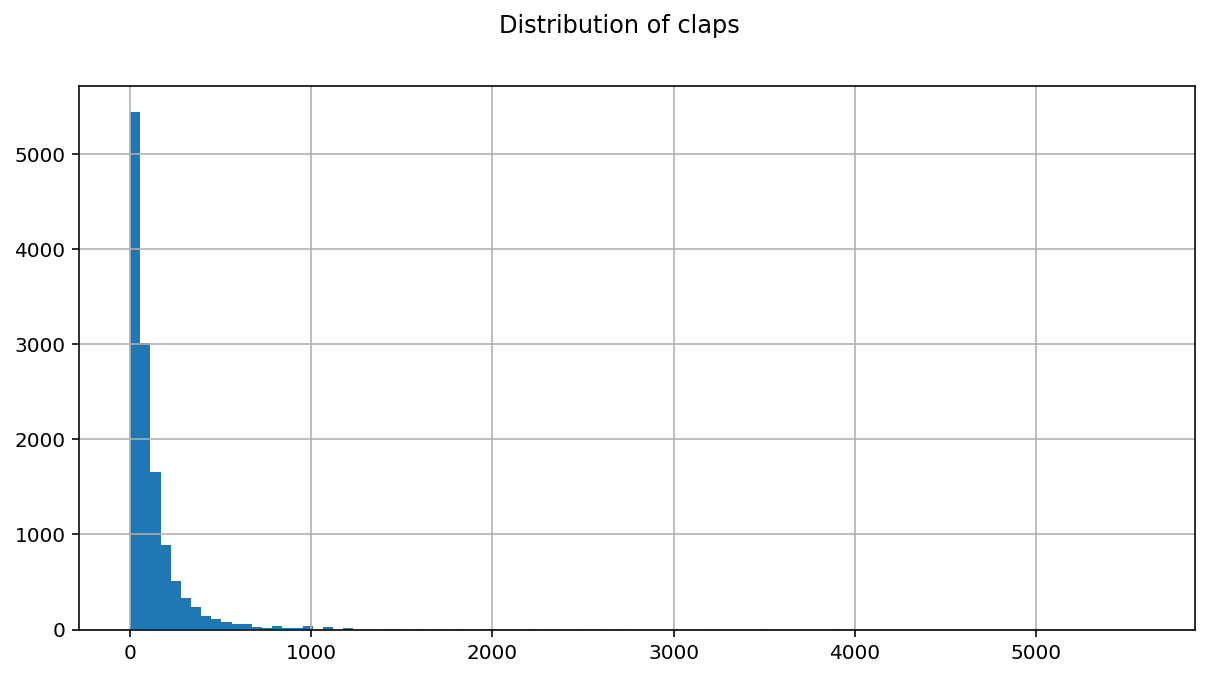

<IPython.core.display.Javascript object>

In [7]:
_ = medium_df["claps"].hist(bins=100, figsize=(10, 5))
plt.suptitle("Distribution of claps")
plt.show()

#### Histogram of log(claps)

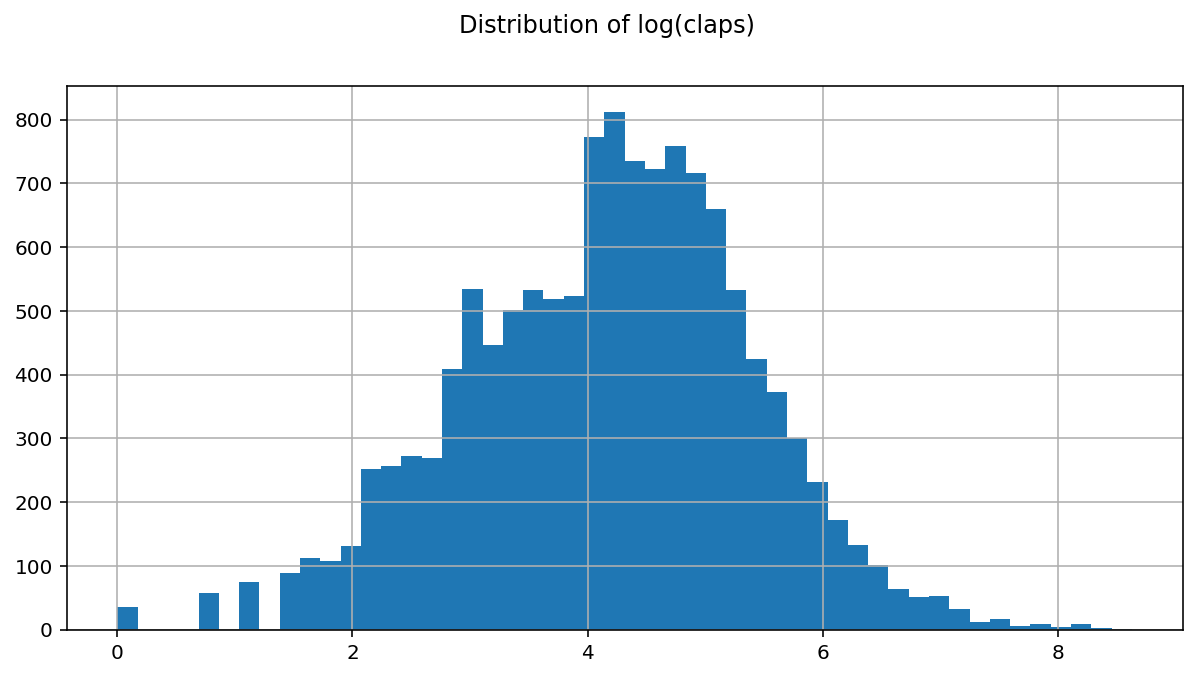

<IPython.core.display.Javascript object>

In [8]:
medium_df["log_claps"] = medium_df["claps"].apply(lambda x: np.log1p(x))
_ = medium_df["log_claps"].hist(bins=50, figsize=(10, 5))
plt.suptitle("Distribution of log(claps)")
plt.show()

#### Article with max claps

In [9]:
medium_df[medium_df["log_claps"] == medium_df["log_claps"].max()]

,id,url,author,title,subtitle,claps,responses,reading_time,publication,pub_date,log_claps
12315,12316,https://towardsdatascience.com/stop-using-prin...,Khuyen Tran,Stop Using Print to Debug in Python. Use Icecr...,Are you Using Print or Log to Debug your…,5600,28,4,Towards Data Science,2021-01-13,8.6307


<IPython.core.display.Javascript object>

#### Article with max responses

In [10]:
medium_df[medium_df["responses"] == medium_df["responses"].max()]

,id,url,author,title,subtitle,claps,responses,reading_time,publication,pub_date,log_claps
7544,7545,https://towardsdatascience.com/data-scientists...,Mikhail Mew,Data Scientists Will be Extinct in 10 Years,And Why It’s Not a Bad Thing,2900,87,4,Towards Data Science,2021-05-10,7.972811


<IPython.core.display.Javascript object>

#### Histogram of responses

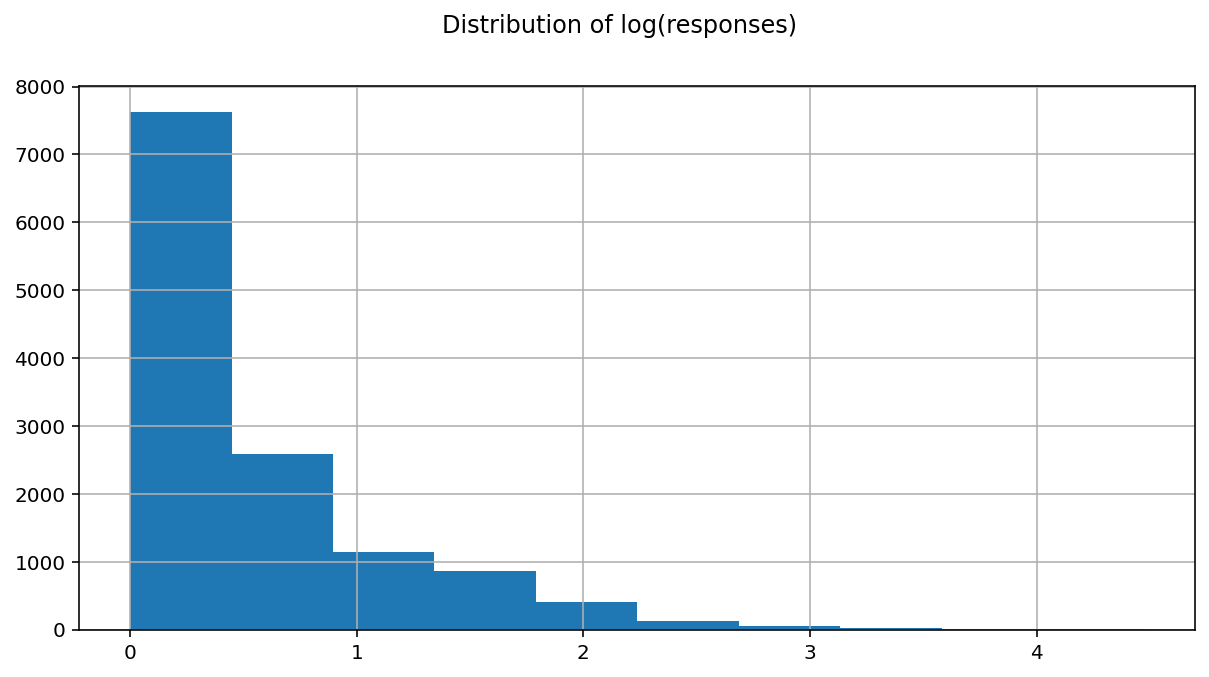

<IPython.core.display.Javascript object>

In [11]:
medium_df["log_responses"] = medium_df["responses"].apply(lambda x: np.log1p(x))
medium_df["log_responses"].hist(bins=10, figsize=(10, 5))
plt.suptitle("Distribution of log(responses)")
plt.show()

####  Correlations

In [12]:
corr = medium_df.corr("pearson")
corr

,id,claps,responses,reading_time,log_claps,log_responses
id,1.000000,-0.004856,-0.007388,-0.005300,-0.006377,0.001769
claps,-0.004856,1.000000,0.636416,0.050699,0.653420,0.485915
responses,-0.007388,0.636416,1.000000,-0.001966,0.398272,0.808594
reading_time,-0.005300,0.050699,-0.001966,1.000000,0.084695,-0.001109
log_claps,-0.006377,0.653420,0.398272,0.084695,1.000000,0.452670
log_responses,0.001769,0.485915,0.808594,-0.001109,0.452670,1.000000


<IPython.core.display.Javascript object>

OBSERVATION: the highest correlated are claps/log_claps and log_responses variables

#### Claps vs Responses

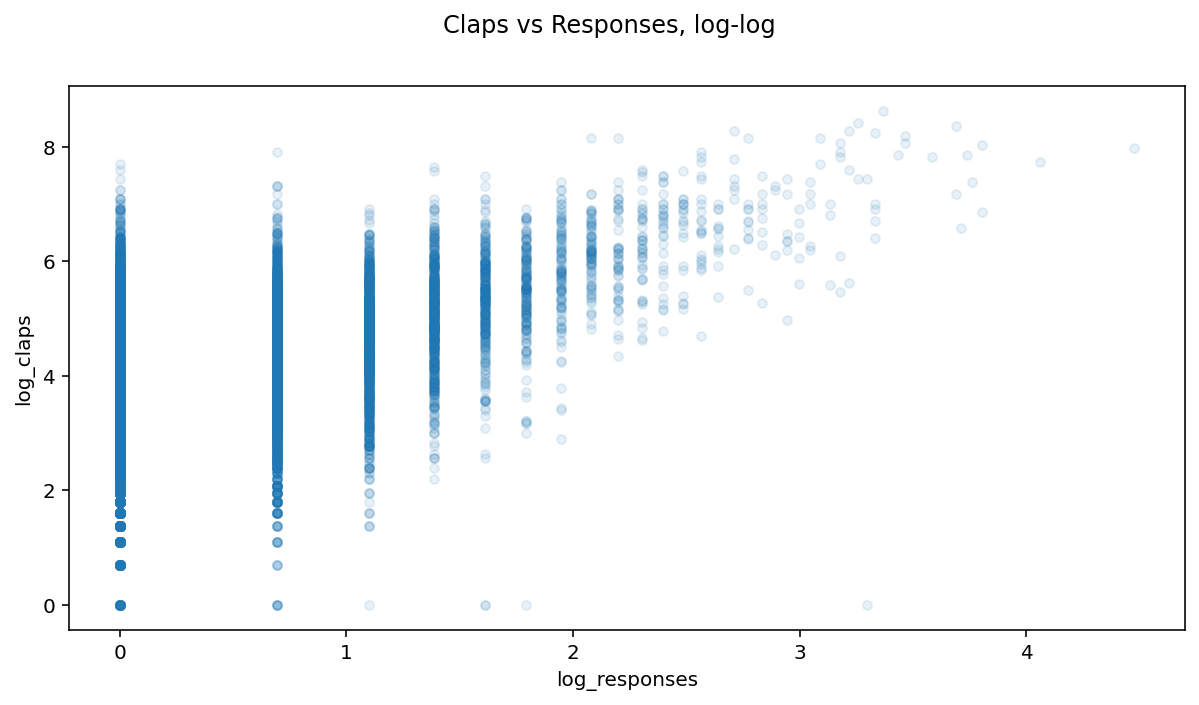

<IPython.core.display.Javascript object>

In [13]:
_ = medium_df.plot(kind="scatter", y="log_claps", x="log_responses", alpha=0.1)
plt.suptitle("Claps vs Responses, log-log")
plt.show()

OBSERVATION: there is some sort of linear dependency with very high dispersion at smaller number of responses.

#### Let's apply binsreg to have a better look on how reading time affects claps-responses relationship

In [14]:
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(nbins=20, **kwargs)

    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={"x": kwargs.get("x"), "fit": kwargs.get("y")})

    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=["x"])
        df_est["ci"] = df_est["ci_r"] - df_est["ci_l"]

    # Rename groups
    if "by" in kwargs:
        df_est["group"] = df_est["group"].astype(medium_df[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={"group": kwargs.get("by")})

    return df_est

<IPython.core.display.Javascript object>

#### Split data by reading time: 10 minutes or longer is considered a tldr

In [15]:
tldr_cutoff = 10
medium_df["tldr"] = medium_df["reading_time"].apply(
    lambda x: 0 if x <= tldr_cutoff else 1
)

# Estimate binsreg
df_est = binscatter(
    y="log_responses", x="log_claps", by="tldr", data=medium_df, ci=(3, 3)
)  # w=['reading_time'],, by='tldr',
df_est.head()

,tldr,log_claps,bin,isknot,mid,log_responses,ci_l,ci_r,ci
0,0,1.438852,0,0,0,0.123156,0.053897,0.109976,0.056079
1,0,2.249647,1,0,0,0.120961,0.113641,0.161728,0.048087
2,0,2.638680,2,0,0,0.170206,0.140252,0.189408,0.049156
3,0,2.943943,3,0,0,0.178167,0.158757,0.210560,0.051803
4,0,3.171226,4,0,0,0.218411,0.181060,0.237966,0.056906


<IPython.core.display.Javascript object>

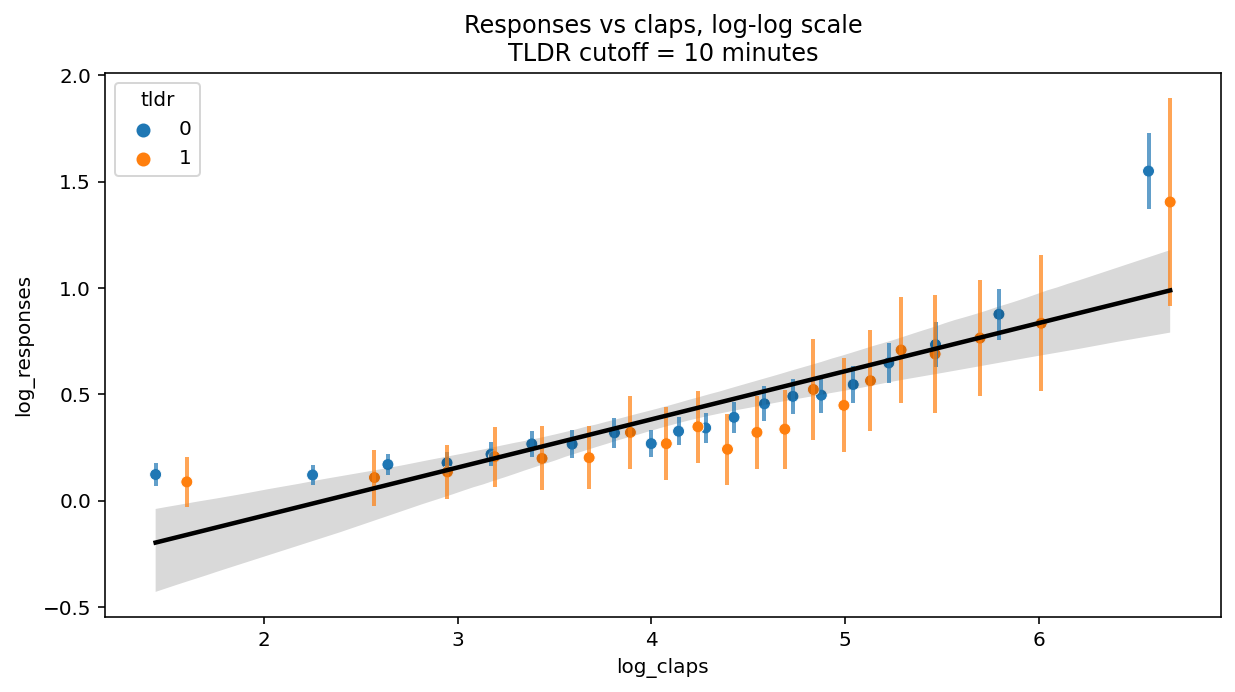

<IPython.core.display.Javascript object>

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [16]:
sns.scatterplot(
    x="log_claps", y="log_responses", data=df_est, hue="tldr",
)
plt.errorbar(
    "log_claps",
    "log_responses",
    yerr="ci",
    data=df_est.query("tldr==0"),
    ls="",
    lw=2,
    alpha=0.7,
)
# ,color='green'
plt.errorbar(
    "log_claps",
    "log_responses",
    yerr="ci",
    data=df_est.query("tldr==1"),
    ls="",
    lw=2,
    alpha=0.7,
)
sns.regplot(x="log_claps", y="log_responses", data=df_est, color="black", scatter=False)
plt.title(f"Responses vs claps, log-log scale\nTLDR cutoff = {tldr_cutoff} minutes")
plt.show()

OBSERVATION: Longer read times lead to lower number of responses given the same number of claps (likes)